In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [26]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
# function to plot a correlation

def correlation_plot(x,y):
    # correlation plot
    corr = plt.scatter(x, y)
  
    # This will fit the best line into the graph
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)));
    return corr

In [29]:
# import southeast df
df = pd.read_csv("data/df.csv")
df.columns

Index(['city', 'state', 'region', 'pop_size range', 'diversity score',
       'pop_est', 'white  (%)', 'black  (%)', 'asian  (%)', 'hisp_lat  (%)',
       'gross metro product (  billions)',
       'casual gain or loss in income (%)  ', 'unemployment rate (%)',
       'unemployed white (%)', 'unemployed black (%)', 'unemployed asian (%)',
       'unemployed latino (%)', 'living wage ( $)',
       'asian med income ( $) state', 'black med income ( $) state',
       'hispanic med income ( $) state', 'white med income ($) state',
       'black median wage  ($) city', 'white  median wage ($) city',
       'latino median wage  ($) city', 'asian median wage  ($) city',
       'blacks with ba degree or higher (%)',
       'whites with ba degree or higher (%)',
       'latinos with ba degree or higher (%)',
       'asians with ba degree or higher (%)',
       '2017 graduation rate for local schools (%)',
       'graduation rate: asian (%)', 'graduation rate: black (%)',
       'graduation rate

In [30]:
# sort se_df by population size estimate

df = df.sort_values(by=['pop_est'], ascending = False)
df

,city,state,region,pop_size range,diversity score,pop_est,white (%),black (%),asian (%),hisp_lat (%),gross metro product ( billions),casual gain or loss in income (%),unemployment rate (%),unemployed white (%),unemployed black (%),unemployed asian (%),unemployed latino (%),living wage ( $),asian med income ( $) state,black med income ( $) state,hispanic med income ( $) state,white med income ($) state,black median wage ($) city,white median wage ($) city,latino median wage ($) city,asian median wage ($) city,blacks with ba degree or higher (%),whites with ba degree or higher (%),latinos with ba degree or higher (%),asians with ba degree or higher (%),2017 graduation rate for local schools (%),graduation rate: asian (%),graduation rate: black (%),graduation rate: hispanic (%),graduation rate: white (%),victims of hate crimes,state congress party majority,mayoral political party,governor political party
9,new york,new york,northeast,1M+,69.4,8336817.0,0.321,0.243,0.141,0.291,1219.6,-9.0,0.09,0.04,0.10,0.05,0.08,20.00,76341.0,48557.0,49159.0,78782.0,20.98,33.02,17.52,22.99,0.26,0.63,0.19,0.44,0.78,0.82,0.74,0.75,0.82,90.0,democrat,democrat,democratic
33,los angeles,california,west,1M+,65.2,3979576.0,0.285,0.089,0.116,0.485,1000.0,-9.2,0.10,0.07,0.11,0.05,0.06,19.22,96962.0,51837.0,58703.0,87089.0,21.33,30.17,14.02,24.80,0.27,0.57,0.11,0.57,0.84,0.85,0.80,0.84,0.74,118.0,democrat,democrat,democratic
0,chicago,illinois,midwest,1M+,63.3,2693976.0,0.333,0.296,0.066,0.288,629.2,-11.1,0.08,0.04,0.17,0.05,0.07,16.08,90278.0,38573.0,55836.0,73686.0,19.29,30.13,15.33,26.45,0.22,0.67,0.16,0.62,0.75,0.80,0.76,0.74,0.73,18.0,democrat,democrat,democratic
23,houston,texas,southwest,1M+,64.3,2320268.0,0.244,0.226,0.068,0.450,458.6,-2.8,0.07,0.04,0.10,0.04,0.04,14.29,88486.0,46572.0,49260.0,75879.0,17.58,32.64,13.58,28.17,0.25,0.62,0.12,0.61,0.89,0.91,0.87,0.87,0.86,13.0,republican,democrat,republican
28,phoenix,arizona,southwest,1M+,61.0,1680992.0,0.425,0.071,0.038,0.426,258.1,0.7,0.06,0.05,0.09,0.05,0.06,15.41,78785.0,47386.0,48649.0,64657.0,17.36,22.99,14.88,28.16,0.20,0.39,0.09,0.57,0.82,0.81,0.78,0.82,0.81,111.0,democrat,democrat,republican
10,philadelphia,pennsylvania,northeast,1M+,56.5,1584064.0,0.345,0.421,0.072,0.147,297.9,-2.0,0.06,0.05,0.12,0.08,0.11,14.47,76682.0,38560.0,41725.0,66184.0,17.95,24.28,15.42,17.58,0.17,0.45,0.13,0.39,0.70,0.79,0.71,0.65,0.63,7.0,50/50,democrat,democratic
26,san antonio,texas,southwest,1M+,52.6,1547253.0,0.247,0.070,0.028,0.642,135.4,-9.7,0.06,0.04,0.07,0.04,0.06,13.47,88486.0,46572.0,49260.0,75879.0,17.36,22.99,15.64,24.53,0.25,0.45,0.16,0.57,0.92,0.87,0.87,0.91,0.89,5.0,republican,independent,republican
36,san diego,california,west,1M+,65.6,1423851.0,0.428,0.064,0.167,0.303,239.6,3.3,0.07,0.05,0.09,0.05,0.08,19.63,96962.0,51837.0,58703.0,87089.0,20.44,30.13,17.10,26.22,0.25,0.58,0.19,0.54,0.92,0.89,0.82,0.91,0.88,8.0,democrat,democrat,democratic
20,dallas,texas,southwest,1M+,62.6,1343573.0,0.290,0.243,0.034,0.418,516.5,-2.7,0.06,0.03,0.09,0.03,0.04,15.00,88486.0,46572.0,49260.0,75879.0,15.08,29.14,13.11,25.83,0.15,0.63,0.08,0.63,0.90,0.84,0.86,0.89,0.83,13.0,republican,democrat,republican
38,san jose,california,west,1M+,68.6,1021795.0,0.257,0.030,0.359,0.316,329.2,1.9,0.05,0.05,0.07,0.05,0.07,25.12,96962.0,51837.0,58703.0,87089.0,25.55,39.39,18.60,33.48,0.34,0.53,0.14,0.56,0.91,0.94,0.80,0.85,0.88,13.0,democrat,democrat,democratic


# Population

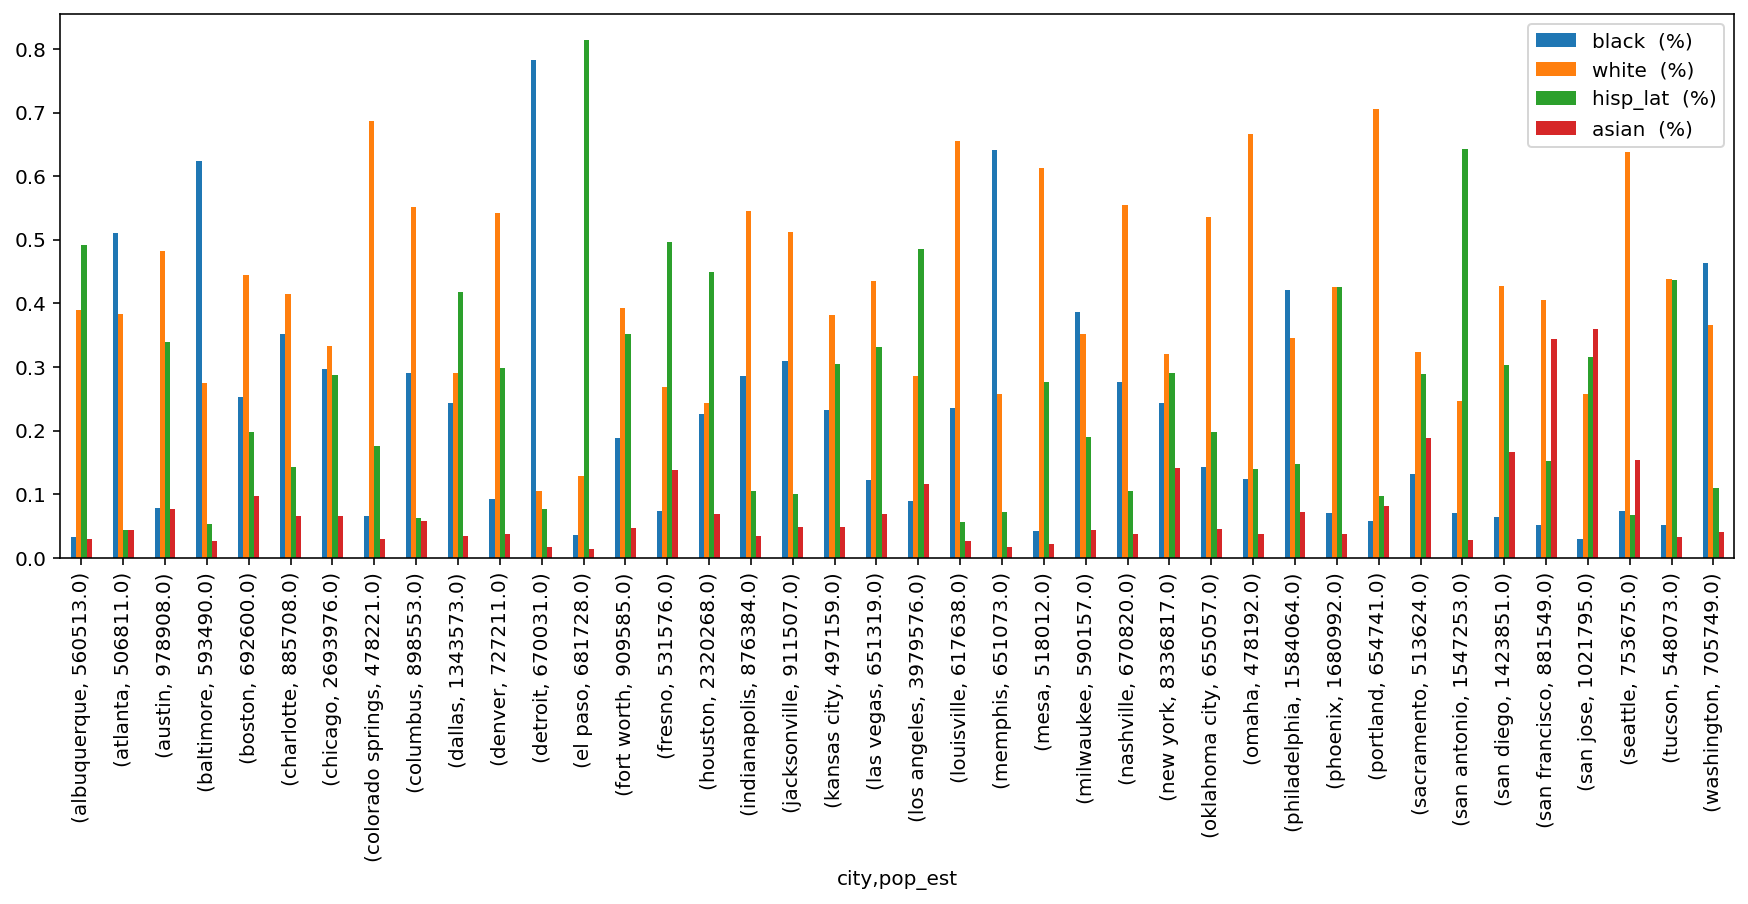

In [31]:
# bar plot of each white, black, asian, and hispanic latin population percentage
dem_plot = df.groupby(["city","pop_est"])[[
    "black  (%)", "white  (%)", "hisp_lat  (%)", "asian  (%)"
]].sum()
dem_plot.plot.bar(figsize = (15,5));

# Unemployment

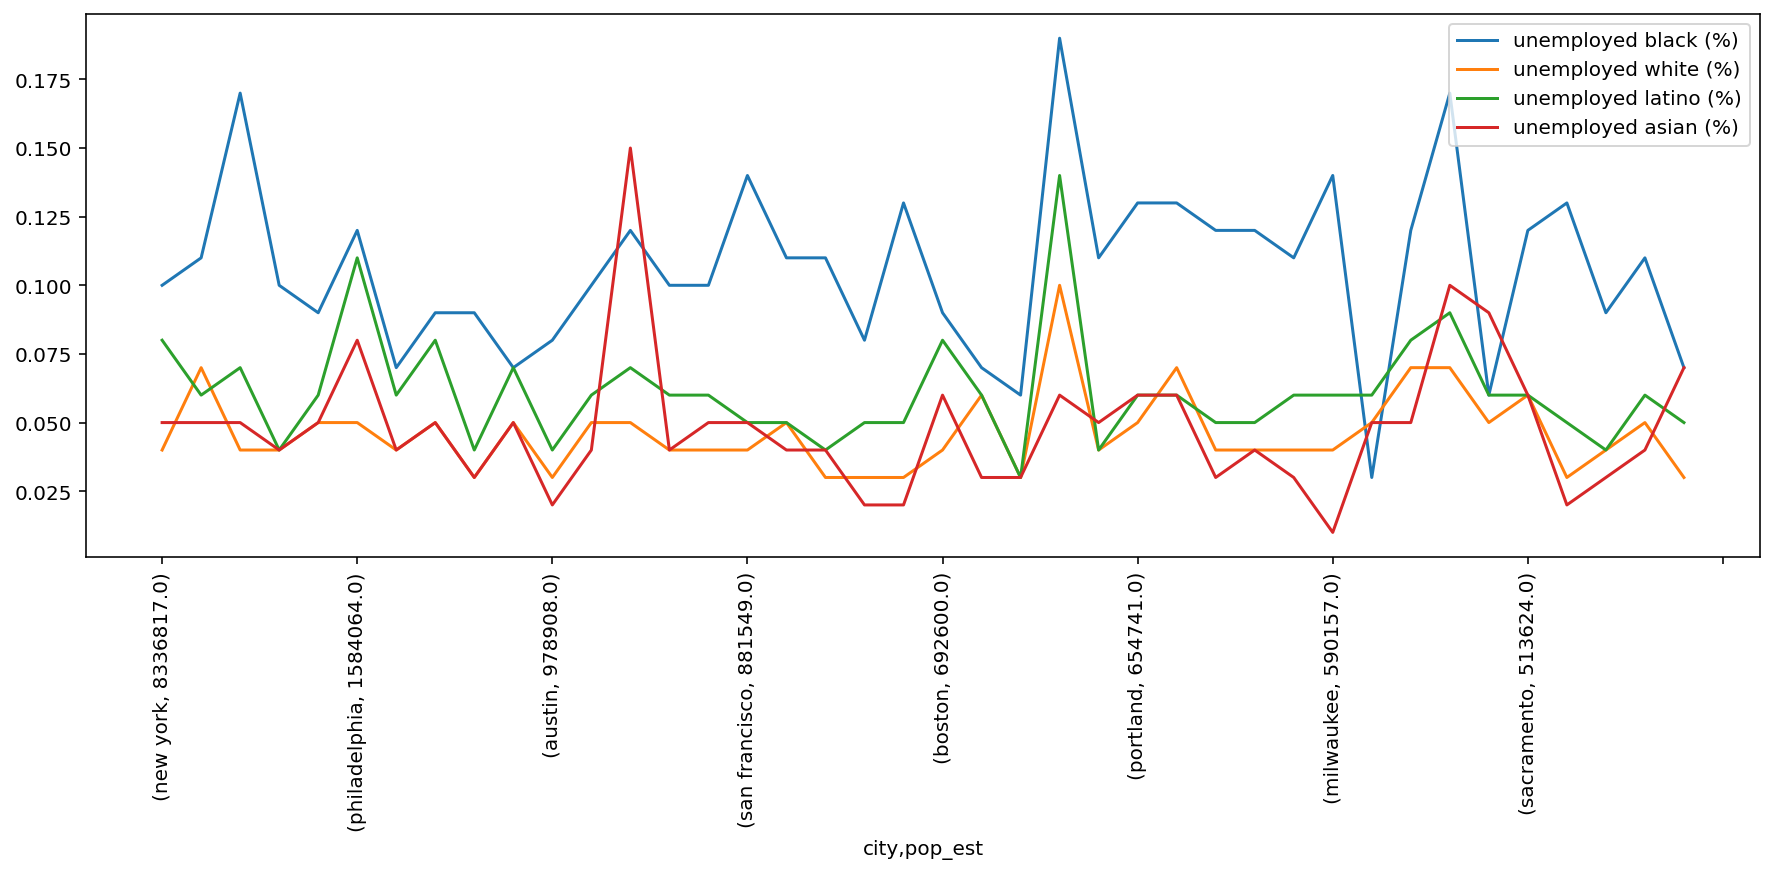

In [35]:
# plot of unemployment percentages

unemp_plot = df.groupby(["city","pop_est"])[[
    'unemployed black (%)', 'unemployed white (%)', 
       'unemployed latino (%)','unemployed asian (%)' 
]].sum().sort_values(by = "pop_est", ascending = False)
unemp_plot.plot(figsize = (15,5))
plt.xticks(rotation=90);

In [10]:
# correlation of population percentage and unemployment

black_unemp_pop_corr = df[['unemployed black (%)',"black  (%)"]].corr()
black_unemp_pop_corr

,unemployed black (%),black (%)
unemployed black (%),1.000000,0.456196
black (%),0.456196,1.000000


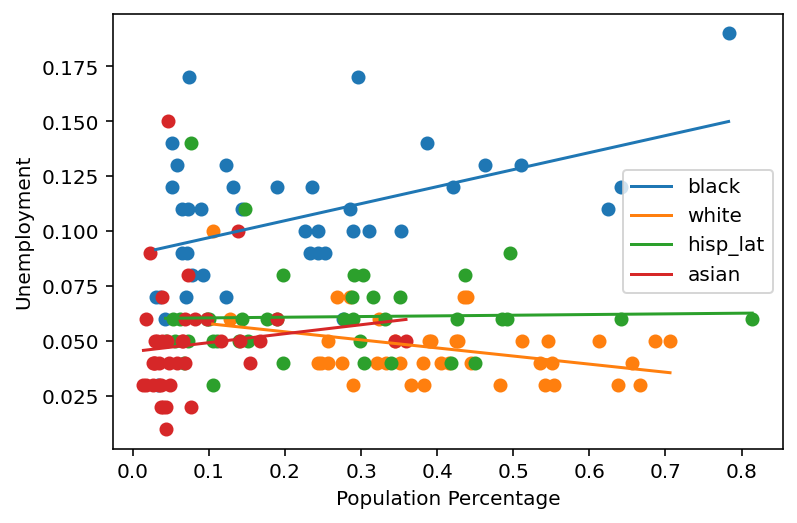

In [11]:
# Correlation plot of Unemployment and Population

correlation_plot(df["black  (%)"], df['unemployed black (%)'])

correlation_plot(df["white  (%)"], df['unemployed white (%)'])

correlation_plot(df["hisp_lat  (%)"], df['unemployed latino (%)'])

correlation_plot(df["asian  (%)"], df['unemployed asian (%)'])

plt.xlabel('Population Percentage')
plt.ylabel('Unemployment')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Income

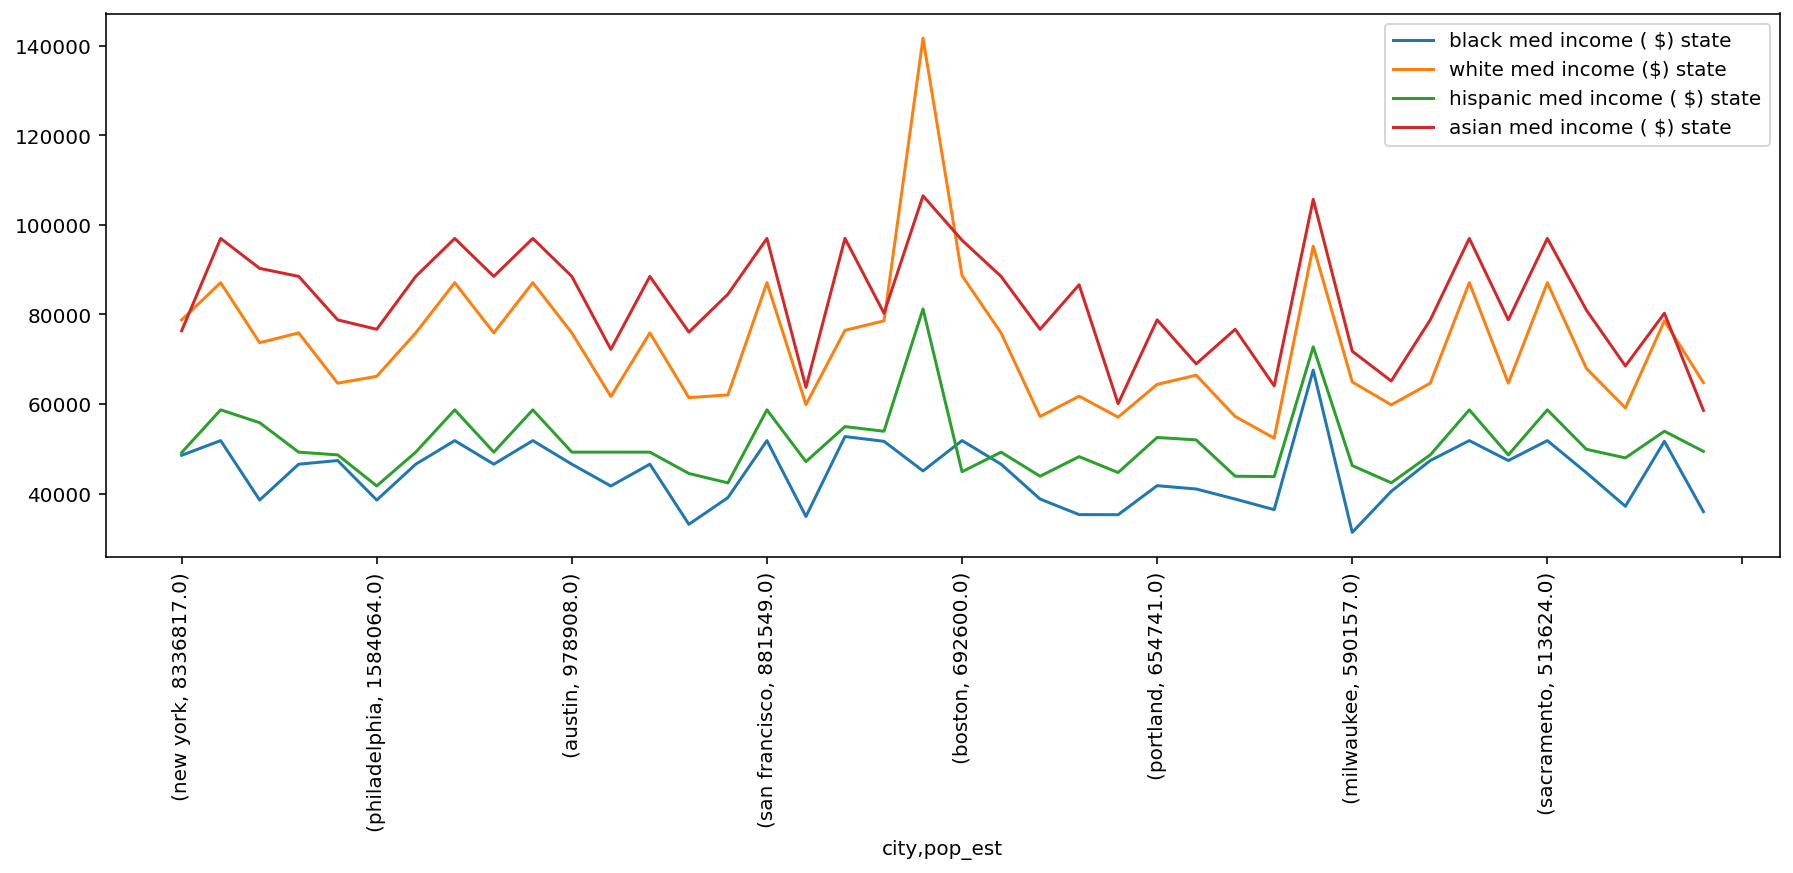

In [12]:
# Plot of median income per demographic and city sorted in ascending by largest population

med_inc_plot = df.groupby(["city","pop_est"])[[
    'black med income ( $) state', 'white med income ($) state',
       'hispanic med income ( $) state', 'asian med income ( $) state' 
]].sum().sort_values(by = "pop_est", ascending = False)
med_inc_plot.plot(figsize = (15,5))
plt.xticks(rotation=90);

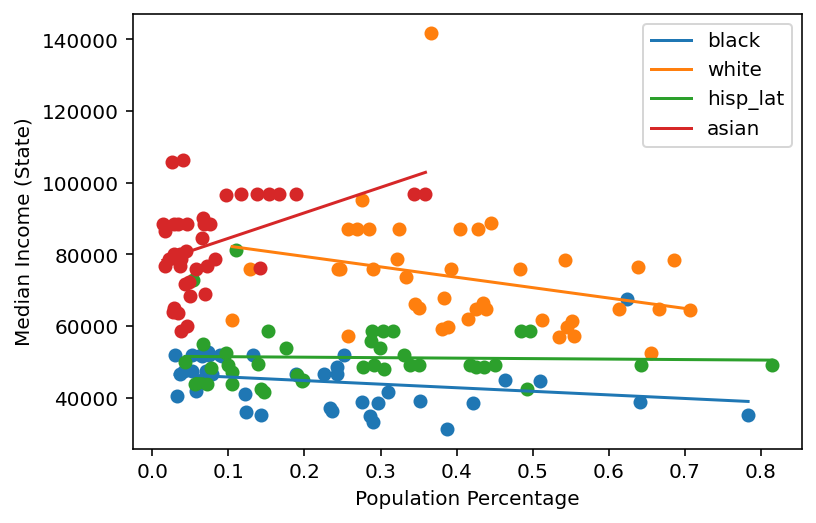

In [13]:
# Correlation plot of Median Income (State) and Population

correlation_plot(df["black  (%)"], df['black med income ( $) state'])

correlation_plot(df["white  (%)"], df['white med income ($) state'])

correlation_plot(df["hisp_lat  (%)"], df['hispanic med income ( $) state'])

correlation_plot(df["asian  (%)"], df['asian med income ( $) state'])

plt.xlabel('Population Percentage')
plt.ylabel('Median Income (State)')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Wage

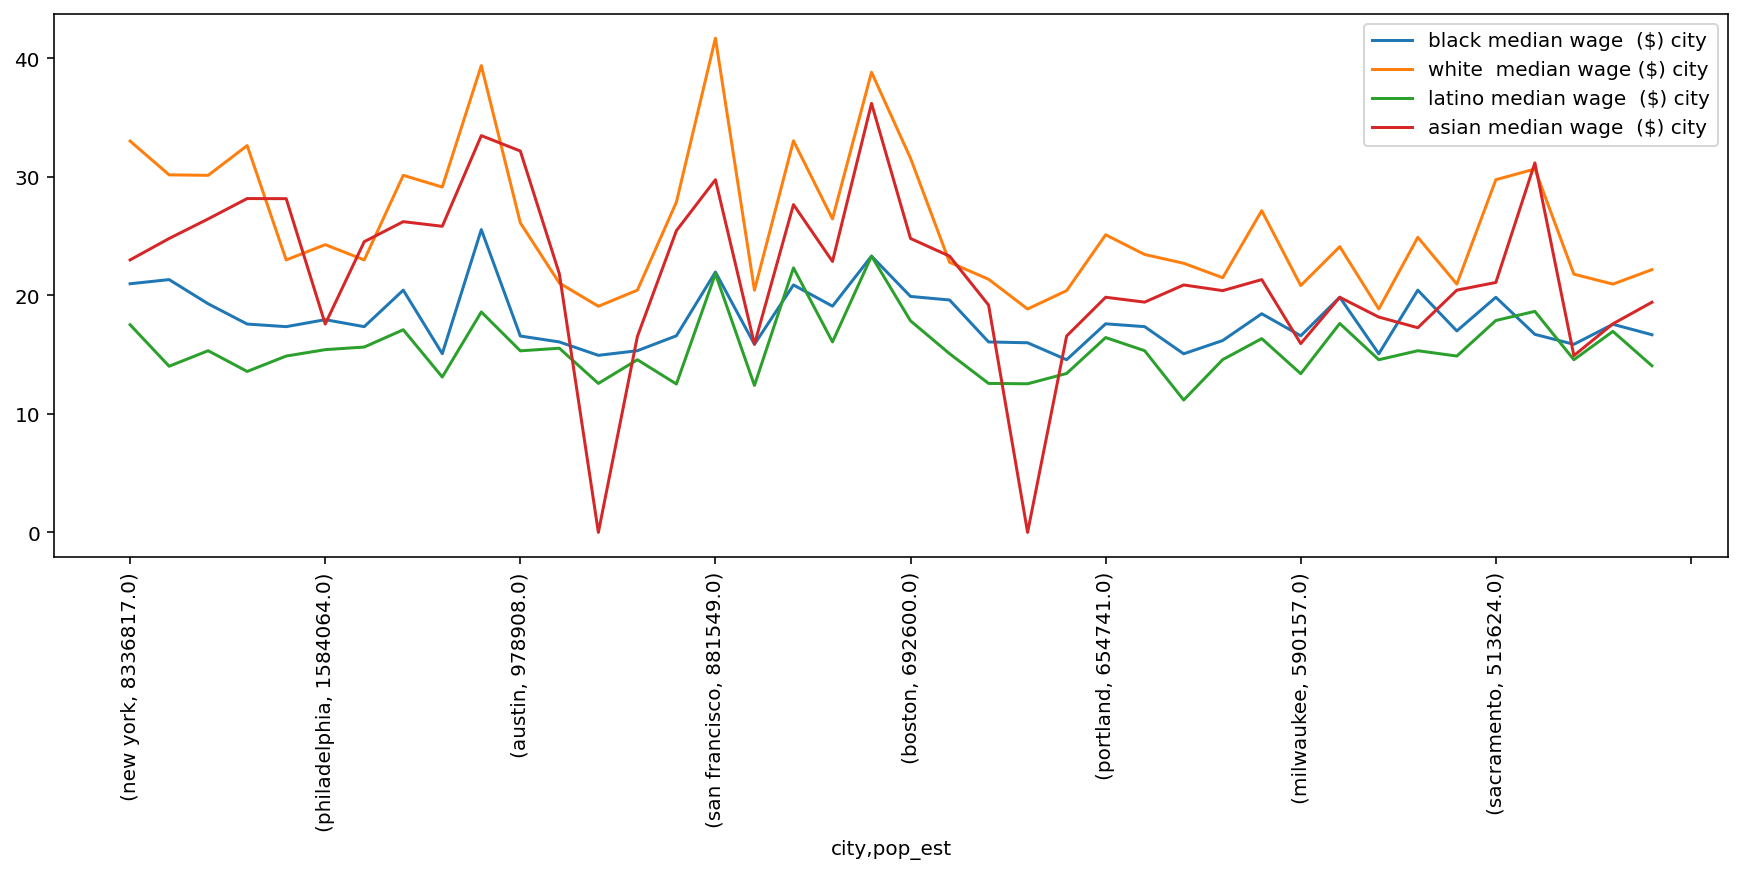

In [14]:
# Plot of median wage per demographic and city sorted in ascending by largest population

wage_plot = df.groupby(["city","pop_est"])[[
    'black median wage  ($) city', 'white  median wage ($) city',
       'latino median wage  ($) city', 'asian median wage  ($) city' 
]].sum().sort_values(by = "pop_est", ascending = False)
wage_plot.plot(figsize = (15,5))
plt.xticks(rotation=90);

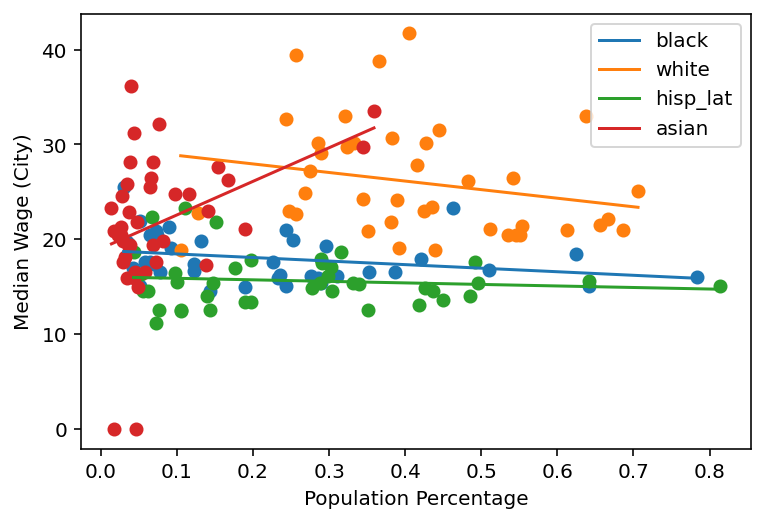

In [15]:
# Correlation plot of Median Wage (City) and Population

correlation_plot(df["black  (%)"], df['black median wage  ($) city'])

correlation_plot(df["white  (%)"], df['white  median wage ($) city'])

correlation_plot(df["hisp_lat  (%)"], df['latino median wage  ($) city'])

correlation_plot(df["asian  (%)"], df['asian median wage  ($) city'])

plt.xlabel('Population Percentage')
plt.ylabel('Median Wage (City)')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Education (BA Degree or Higher)

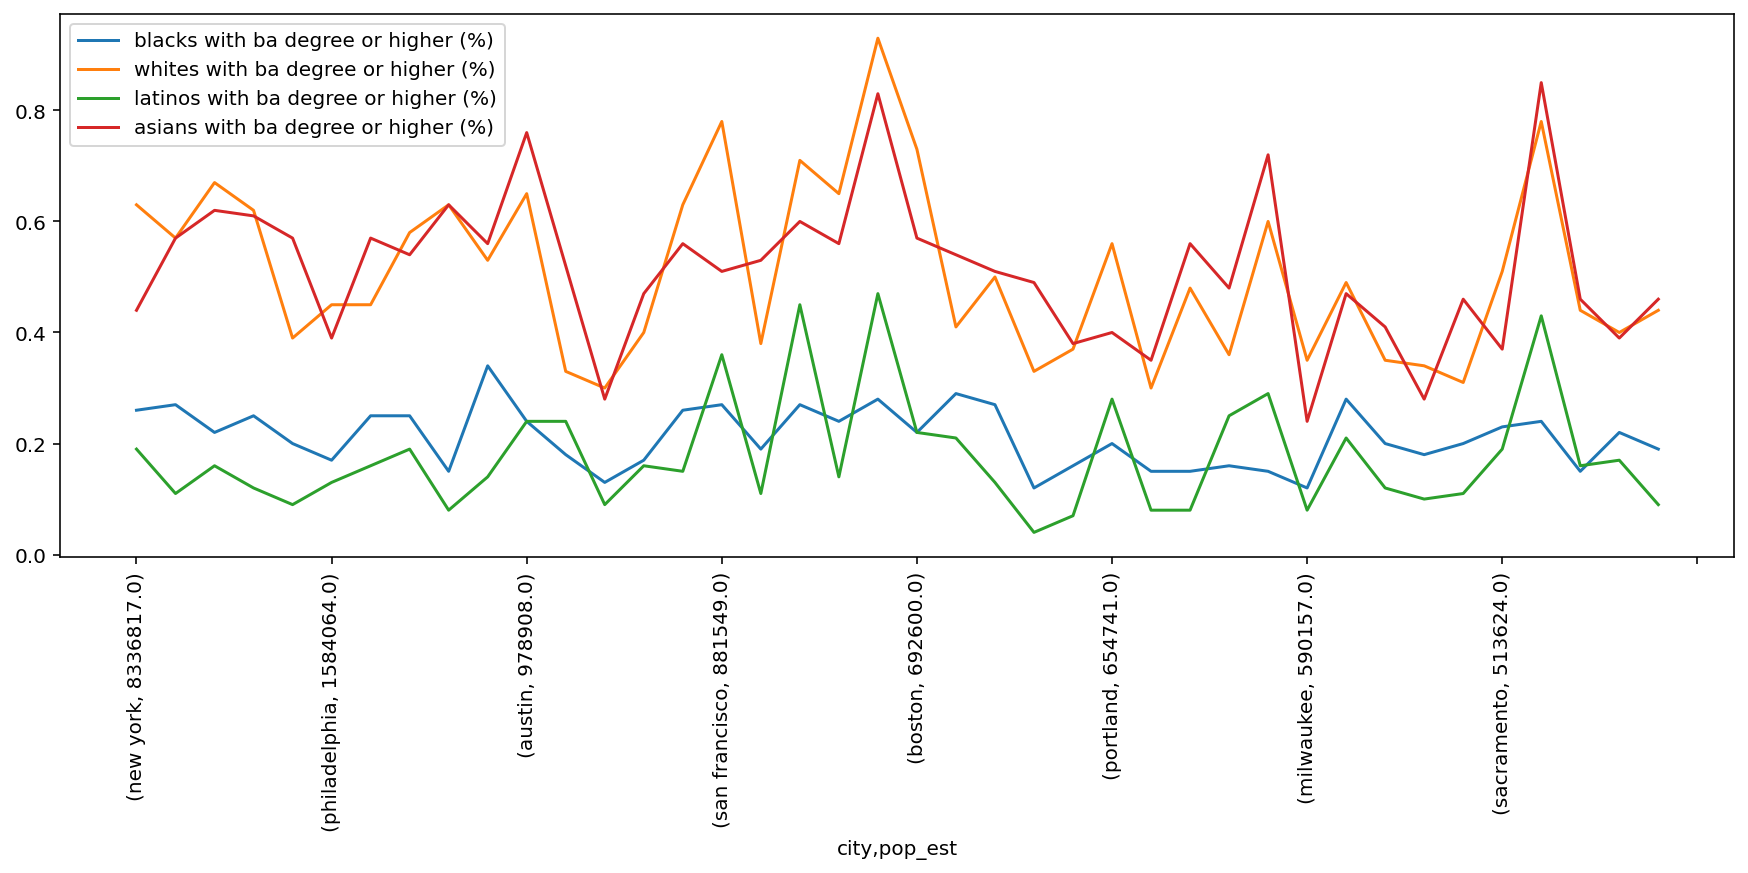

In [16]:
# Plot of BA degree or higher per demographic and city sorted in ascending by largest population

ba_plot = df.groupby(["city","pop_est"])[[
    'blacks with ba degree or higher (%)',
       'whites with ba degree or higher (%)',
       'latinos with ba degree or higher (%)',
       'asians with ba degree or higher (%)' 
]].sum().sort_values(by = "pop_est", ascending = False)
ba_plot.plot(figsize = (15,5))
plt.xticks(rotation=90);

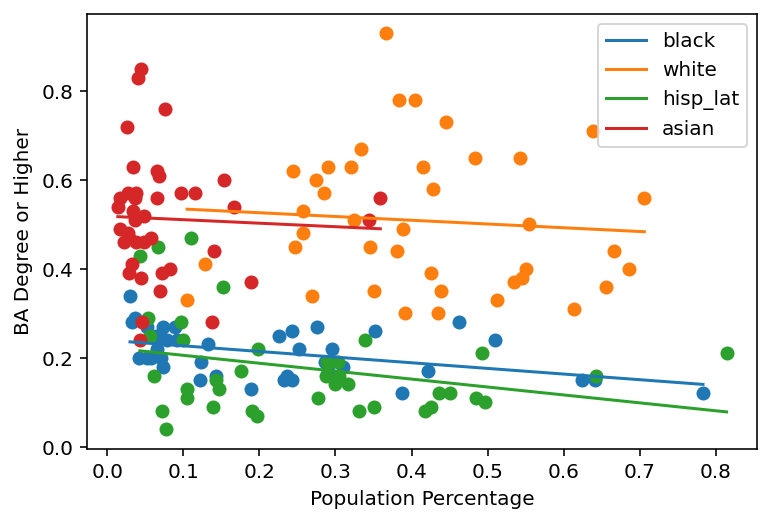

In [17]:
# Correlation plot of BA Degree or Higher and Population

correlation_plot(df["black  (%)"], df['blacks with ba degree or higher (%)'])

correlation_plot(df["white  (%)"], df['whites with ba degree or higher (%)'])

correlation_plot(df["hisp_lat  (%)"], df['latinos with ba degree or higher (%)'])

correlation_plot(df["asian  (%)"], df['asians with ba degree or higher (%)'])

plt.xlabel('Population Percentage')
plt.ylabel('BA Degree or Higher')
plt.legend(["black", "white", "hisp_lat", "asian"]);

# Education (Graduation Rate)

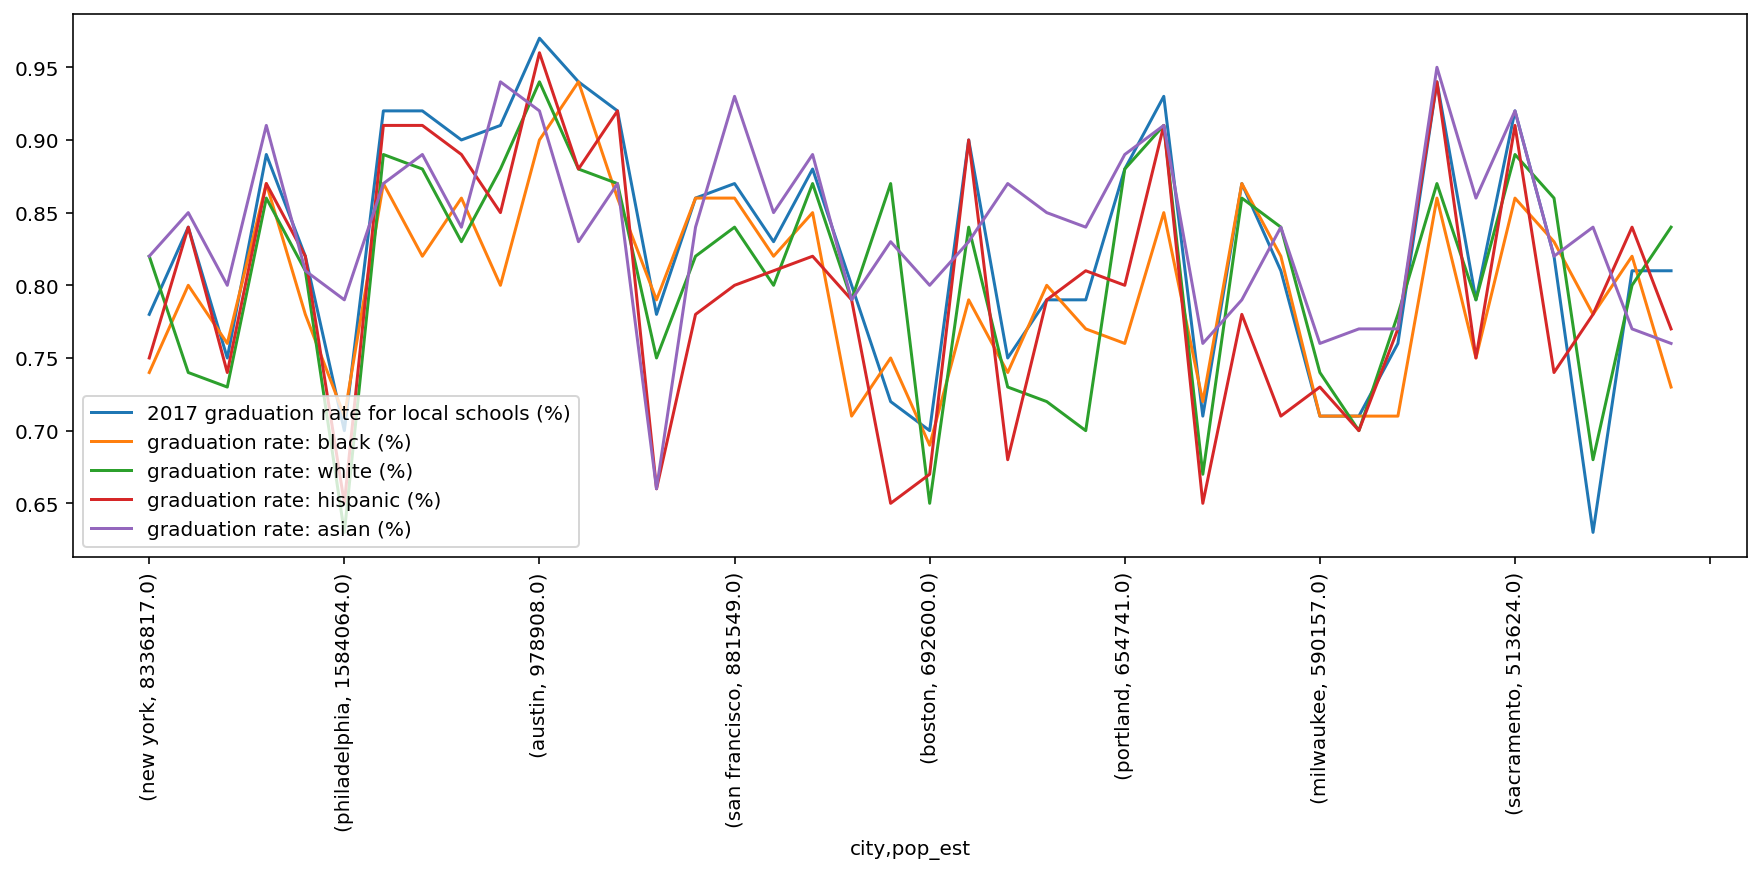

In [18]:
# Plot of graduation rate per demographic and city sorted in ascending by largest population

grad_plot = df.groupby(["city","pop_est"])[[
    '2017 graduation rate for local schools (%)',
       'graduation rate: black (%)', 'graduation rate: white (%)',
       'graduation rate: hispanic (%)','graduation rate: asian (%)' 
]].sum().sort_values(by = "pop_est", ascending = False)
grad_plot.plot(figsize = (15,5))
plt.xticks(rotation=90);

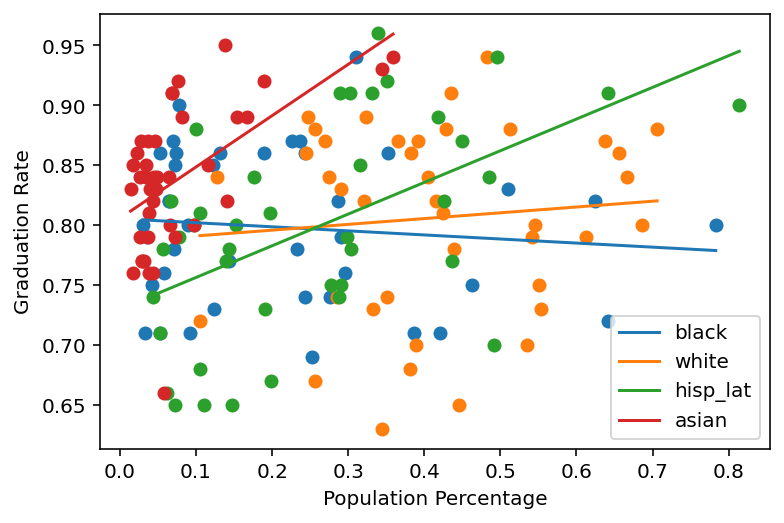

In [19]:
# Correlation plot of BA Degree or Higher and Population

correlation_plot(df["black  (%)"], df['graduation rate: black (%)'])

correlation_plot(df["white  (%)"], df['graduation rate: white (%)'])

correlation_plot(df["hisp_lat  (%)"], df['graduation rate: hispanic (%)'])

correlation_plot(df["asian  (%)"], df['graduation rate: asian (%)'])

plt.xlabel('Population Percentage')
plt.ylabel('Graduation Rate')
plt.legend(["black", "white", "hisp_lat", "asian"]);

In [36]:
df.columns

Index(['city', 'state', 'region', 'pop_size range', 'diversity score',
       'pop_est', 'white  (%)', 'black  (%)', 'asian  (%)', 'hisp_lat  (%)',
       'gross metro product (  billions)',
       'casual gain or loss in income (%)  ', 'unemployment rate (%)',
       'unemployed white (%)', 'unemployed black (%)', 'unemployed asian (%)',
       'unemployed latino (%)', 'living wage ( $)',
       'asian med income ( $) state', 'black med income ( $) state',
       'hispanic med income ( $) state', 'white med income ($) state',
       'black median wage  ($) city', 'white  median wage ($) city',
       'latino median wage  ($) city', 'asian median wage  ($) city',
       'blacks with ba degree or higher (%)',
       'whites with ba degree or higher (%)',
       'latinos with ba degree or higher (%)',
       'asians with ba degree or higher (%)',
       '2017 graduation rate for local schools (%)',
       'graduation rate: asian (%)', 'graduation rate: black (%)',
       'graduation rate

# Hate Crimes

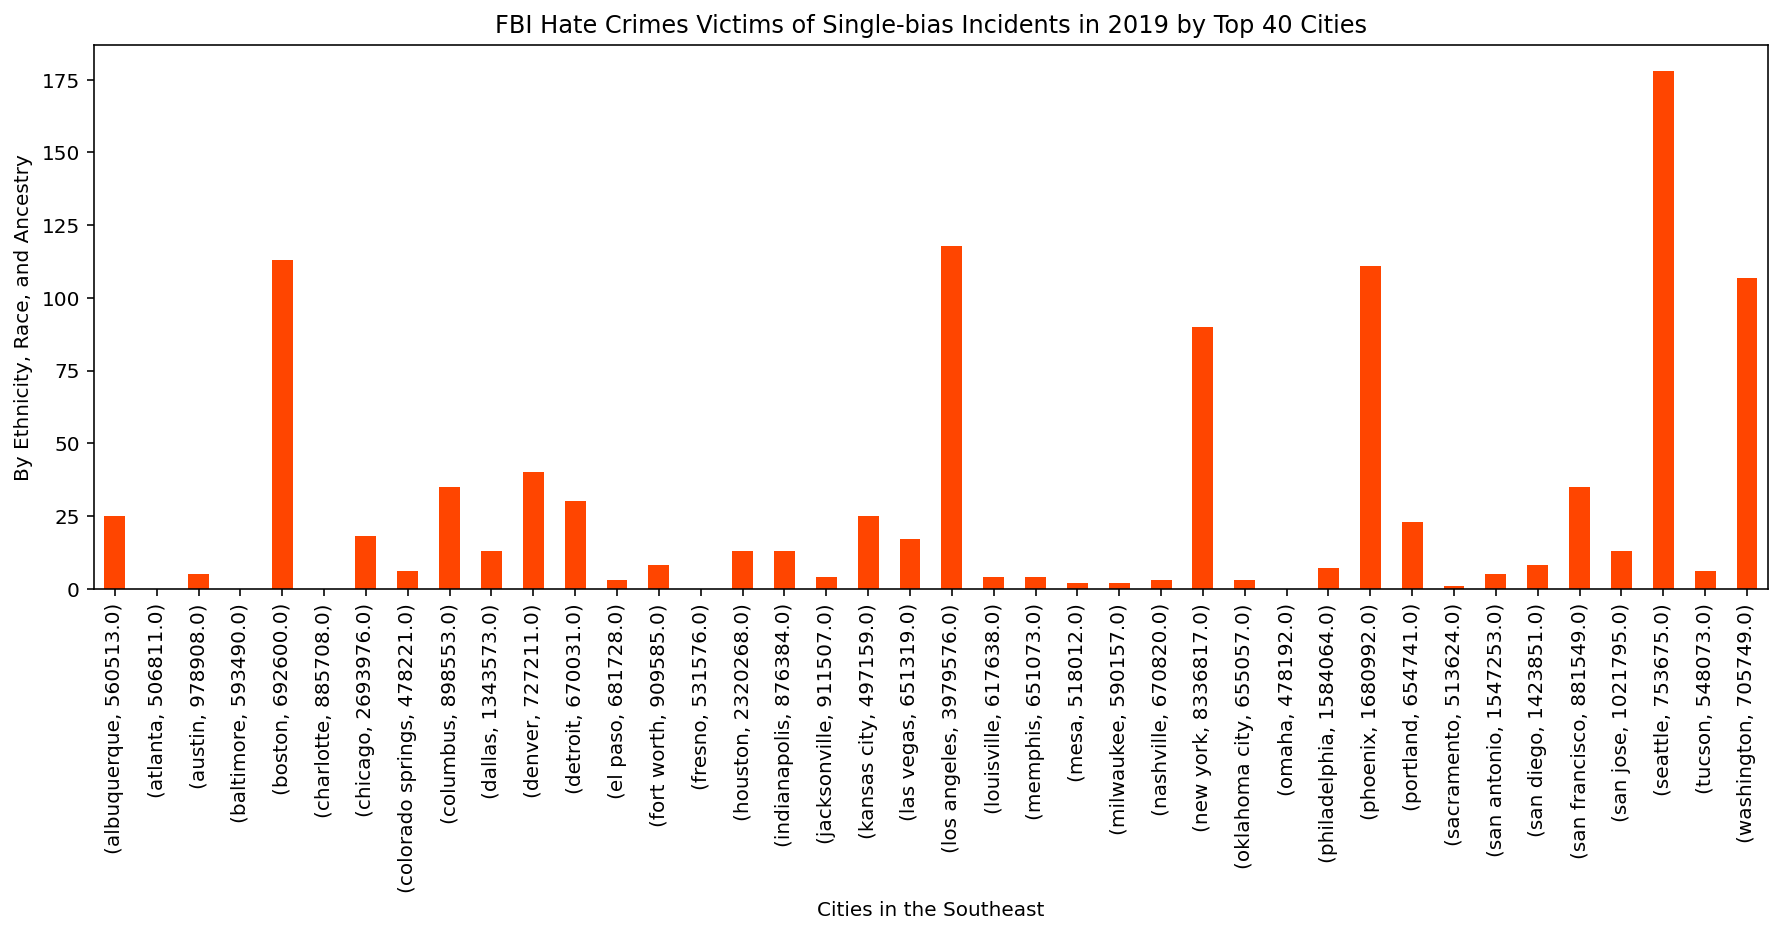

In [37]:
# FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities by Region

hc_city_plot = df.groupby(["city", "pop_est"])["victims of hate crimes "].sum()
hc_city_plot.plot.bar(color = "orangered", figsize = (15,5))
plt.xlabel("Cities in the Southeast")
plt.ylabel("By Ethnicity, Race, and Ancestry")
plt.title("FBI Hate Crimes Victims of Single-bias Incidents in 2019 by Top 40 Cities");

# Political Party Majorities

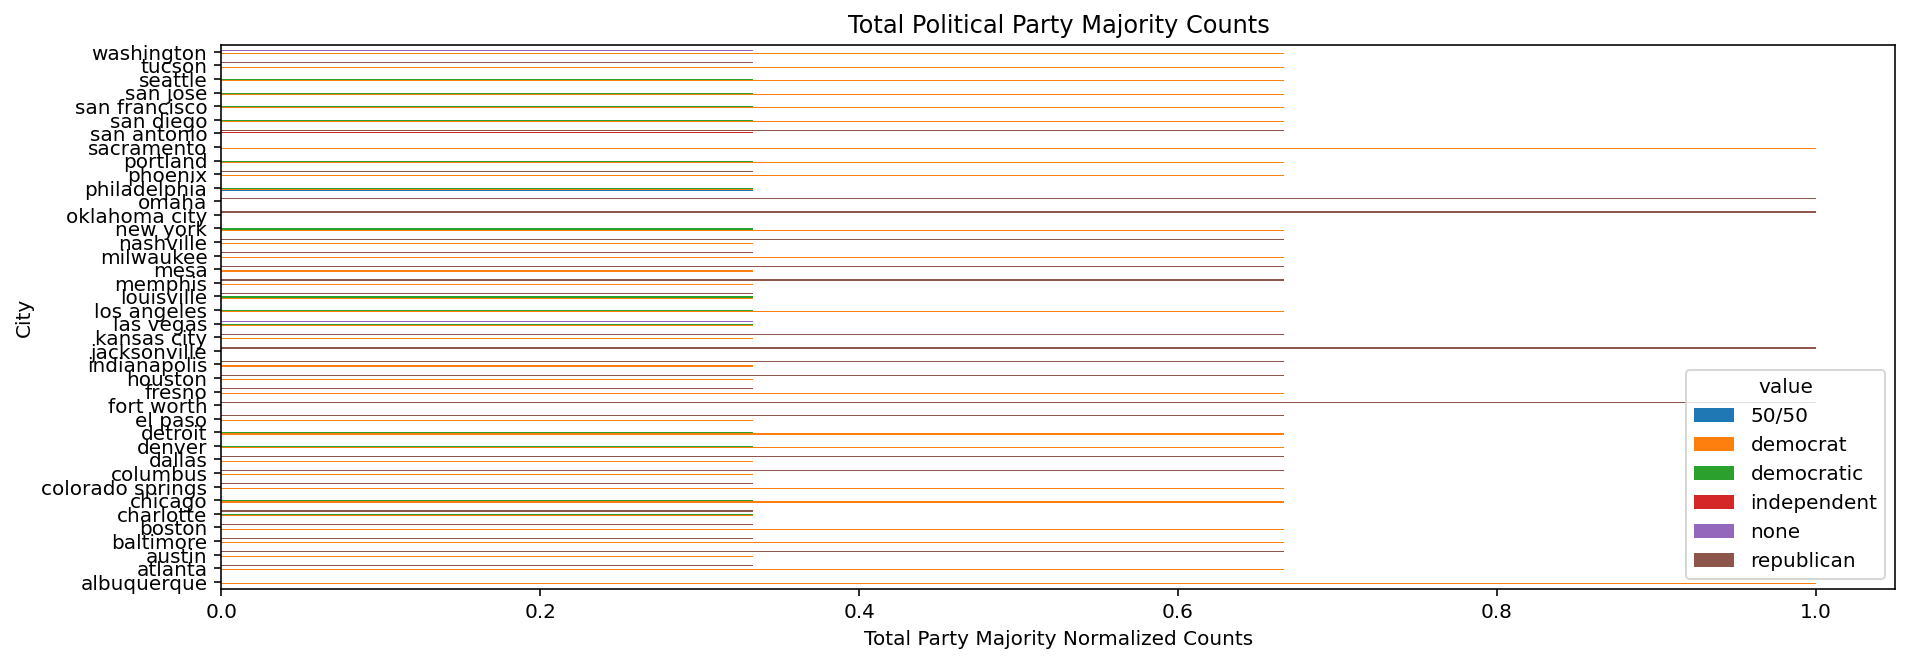

In [38]:
# Total Party Majority Counts

political = df[["city", 'state congress party majority',
       'mayoral political party', 'governor political party']]
political = political.melt(id_vars = ["city"], value_vars = ['state congress party majority',
       'mayoral political party', 'governor political party'])
political_gb = political.groupby("city")["value"].value_counts(normalize=True).unstack()
political_gb.plot.barh(figsize = (15,5))
plt.xlabel("Total Party Majority Normalized Counts")
plt.ylabel("City")
plt.title("Total Political Party Majority Counts");